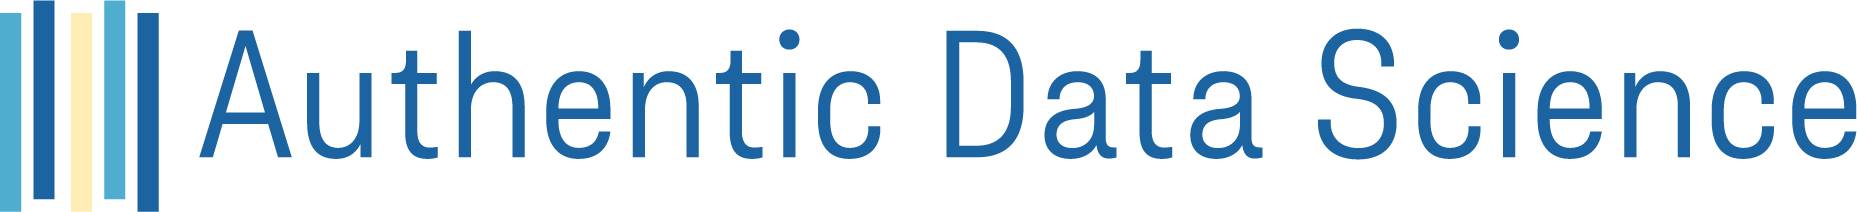

All rights to this material and its parts reserved by the authors:
- Róbert Barcík (robert@authenticdatascience.com)
- Patrik Žatko (patrik@authenticdatascience.com)
- Jana Gecelovská (janka@authenticdatascience.com)


# 0. Introduction to this notebook

We have prepared a mini notebook for you to explore and try working with data using Python. In this notebook, we won't go into technical details. Instead, let's focus on understanding the concepts described and getting an idea of working with data in Python. 

**We recommend you to try each operation yourself by pressing the "play" button on the left side next to the code.** 

Run individual cells linearly - from the top down. If you skip any cells, it could happen that some variable (we'll talk about them later) wouldn't be created, and the cells that come later might not work.

**Of course, you can also edit the code and play with it!** If you feel like something has gone wrong, just download this notebook again.



## Importing libraries

In Python, we often use various libraries, which are sets of predefined functions that can be used anytime. 

First, load the libraries we'll use in this notebook. You can check a library version installed on your system and install a specific version. If the below imports return an error that the package is missing or the version does not match, please follow the instructions below.

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import sklearn
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier

# For natural language processing
from sklearn.feature_extraction.text import CountVectorizer 

# If you work in Jupyter and have problem with displaying visuals, please, uncomment and run the code below
#%matplotlib inline

# We will use Matplotlib library and pyplot package only to set the size of visuals
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13,10]

In [ ]:
# 1. You can check library versions installed in your environment by uncommenting and executing the following print statements:
#print('numpy version:',pd.__version__)
#print('pandas version:',pd.__version__)
#print('Seaborn version:',sns.__version__)
#print('sklearn version:', sklearn.__version__)
#print('matplotlib version:',matplotlib.__version__)

# 2. To install library versions that this notebook was built on, please, uncommet and run the below code.
#!pip install numpy==1.21.6
#!pip install pandas==1.3.5
#!pip install seaborn==0.11.2
#!pip install scikit-learn==1.0.2
#!pip install matplotlib==3.2.2
 
# NOTE: If you are working in Jupyter notebook and have any trouble with installing, please write --user at the end of the line:
# -i.e.: !pip install pandas==1.3.5 --user
 
# 3. Please, restart the runtime and import a library again after you install a different version.

## Variables in Python

We start with a simple example with numbers. We can do common mathematical operations in Python, such as addition, multiplication, division, etc. 

Let's say we need to calculate **the product of the numbers 345 and 25**. 

For this calculation, we use the * symbol to multiply the two numbers: 

In [ ]:
# Multiplication
345*25

8625

Okay, we have the result, the number 8625. Suppose we want to work with this number further. For example, use it in another calculation. It would be great to store it somehow so we can overwrite it wherever we need to. This is where *variables* come in.

Using **a variable**, we can store data that we want to work with later, such as numbers, texts, dates, etc. Based on these types, a variable with a value will be stored in a specific location in memory, and we can use it at any time. 

Creating a variable is a simple process. We come up with a name, for example, 'variable_1', and assign it a value of 25 using the '**='** sign.

In [ ]:
# Creating the first variable
variable_1 = 25

Our 'variable_1' is created, and we can view it by typing its name. In the output, we see the number 25:

In [ ]:
# Printing the output
variable_1

25

Let's create one more variable called 'variable_2', from which we will subtract 'variable_1':

In [ ]:
# Creating the second variable
variable_2 = 88

# Printing the output
variable_2

88

Now we can use the created variables for the calculation instead of writing the numbers themselves. Again, we store the calculation result in a new variable called 'result'. Python will calculate for us the difference between the numbers 88 and 25 that are stored in the variables:

In [ ]:
# Subtraction
result = variable_2 - variable_1

# Printing the output
result

63

# 1. pandas library 🐼

In the world of programming, we can't really work without variables. We store not only numbers or texts in them but also much more complex structures. Let's demonstrate some more operations on a small dataset we create using a great library, `pandas`. You can read more about `pandas` capabilities in [the documentation](https://pandas.pydata.org/docs/index.html).

Using the **pandas** library, we'll create a **DataFrame** that contains information about the breed of male and female dogs, their height, weight and age. 🐶


> NOTE: Please be mindful that we are creating a DataFrame like this (manually) just for learning purposes. In the real world, we would, for example, load it from a CSV file or query a database through SQL.

Now let's look at the data we'll be working with. 


In [ ]:
# Toy dataset
dog_information = [('Basenji','male dog',10000,40,7),('Australian Shepherd','male dog',20000,50,10),('Irish Setter','male dog',24000,63,10),('Beagle','female dog',9000,38,11),('Border Collie','female dog',17000,50,6),('Dachshund','male dog',11000,45,5),
                   ('Basenji','female dog',8000,37,5),('Australian Shepherd','male dog',23000,48,8),('German Spitz','male dog',3000,25,7),('Irish Setter','male dog',25000,66,10),('Basenji','female dog',7000,36,5),('English Pointer','female dog',25000,65,9),
                   ('Basenji','female dog',13055,45,8),('Australian Shepherd','female dog',21000,53,12),('Irish Setter','male dog',22100,61,12),('Beagle','male dog',9400,39,14),('Border Collie','male dog',17100,52,5),('Dachshund','female dog',13100,44,6),
                   ('German Spitz','male dog',8400,36,3),('Australian Shepherd','male dog',23000,48,8),('German Spitz','male dog',6000,25,7),('Irish Setter','male dog',28000,66,10),('English Pointer','female dog',19100,66,7),('English Pointer','female dog',21300,60,8),
                   ('Dachshund','female dog',16100,44,6),('Australian Shepherd','female dog',19000,59,11),('Border Collie','male dog',16100,52,5),('Dachshund','female dog',15100,49,5),('Border Collie','male dog',16800,57,6),('Border Collie','male dog',15100,52,5),
                   ('Dachshund','male dog',15000,44,6),('Irish Setter','male dog',14500,30,3),('Shih Tzu','male dog',7000,22,6),('Shih Tzu','male dog',5150,19,4),('Irish Setter','male dog',15300,10,2),('Shih Tzu','male dog',8000,21,7),('Dachshund','male dog',14300,46,6),
                   ('Border Collie','female dog',13100,44,8),('Shih Tzu','female dog',6100,19,4),('English Pointer','female dog',14100,40,4),('English Pointer','male dog',15400,42,3)]

# Column labels
column_labels = ['breed','gender','weight (g)','height (cm)','age']

# Creating a DataFrame using pandas library
dataset = pd.DataFrame(data = dog_information, columns = column_labels)

A DataFrame is a special structure in which we store data in the form of a table - there are observations in rows, and the columns represent individual characteristics. 

A DataFrame in Python looks very similar to a table in Excel. In the example below, we use `head()` function to print the first 5 rows of the dataset:

In [ ]:
# Printing the first 5 rows
dataset.head()

,breed,gender,weight (g),height (cm),age
0,Basenji,male dog,10000,40,7
1,Australian Shepherd,male dog,20000,50,10
2,Irish Setter,male dog,24000,63,10
3,Beagle,female dog,9000,38,11
4,Border Collie,female dog,17000,50,6


We can work with the data we have stored in the DataFrame differently based on its type. We use different functions for numeric values than we do for processing text data.

Let's now demonstrate some operations on our toy dataset. The column 'weight (g)' represents the weight measured in grams. But we would like the weight to be instead in kilograms. So we can take this column and use the division sign. Each value that is in this column will be divided by the number 1000: 

In [ ]:
# Changing units
dataset['weight (g)'] = dataset['weight (g)'] / 1000

If we now look at the column 'weight (g)', we can see the calculated values of the weights in kilograms:

In [ ]:
# Printing the first 5 rows
dataset.head()

,breed,gender,weight (g),height (cm),age
0,Basenji,male dog,10.0,40,7
1,Australian Shepherd,male dog,20.0,50,10
2,Irish Setter,male dog,24.0,63,10
3,Beagle,female dog,9.0,38,11
4,Border Collie,female dog,17.0,50,6


Let's also rename the column name to clarify that it now represents the weight in kilograms. We'll call `rename()` function from `pandas` library on the DataFrame and define the old and new column names we want:

In [ ]:
# Changing a column name
dataset.rename(columns = {'weight (g)': 'weight (kg)'}, inplace = True)

# Printing the first 5 rows
dataset.head()

,breed,gender,weight (kg),height (cm),age
0,Basenji,male dog,10.0,40,7
1,Australian Shepherd,male dog,20.0,50,10
2,Irish Setter,male dog,24.0,63,10
3,Beagle,female dog,9.0,38,11
4,Border Collie,female dog,17.0,50,6


The DataFrame may not always contain the data we want to work with. However, we can add new columns containing values calculated from our data. For example, we can calculate the weight-to-height ratio and store the calculated values in a new column that we name 'ww_ratio':

In [ ]:
# Creating a new column
dataset['ww_ratio'] = dataset['weight (kg)'] / dataset['height (cm)']

# Printing the first 5 rows
dataset.head()

,breed,gender,weight (kg),height (cm),age,ww_ratio
0,Basenji,male dog,10.0,40,7,0.250000
1,Australian Shepherd,male dog,20.0,50,10,0.400000
2,Irish Setter,male dog,24.0,63,10,0.380952
3,Beagle,female dog,9.0,38,11,0.236842
4,Border Collie,female dog,17.0,50,6,0.340000


At the beginning of the notebook, we talked about how we can create variables. We can also store values from our DataFrame into variables. For example, we want to determine the average weight of dogs. We'll call `mean()` function from `pandas` library on 'weight (kg)' column and store the result in 'average_weight' variable:

In [ ]:
# Creating a new variable
average_weight = dataset['weight (kg)'].mean()

# Printing the output
average_weight

14.870853658536584

In this case, however, it would be more interesting to look at the average weight of dogs according to their breed. We can group the data into categories using `groupby()` function and calculate the average for each group separately. 

We can notice that dogs of the German Spitz breed have the lowest average weight compared to other breeds. On the other hand, Australian Sheperd and Irish Setter dogs weigh the most on average. 

In [ ]:
# Computing the mean values based on the breeds
breeds = dataset.groupby(['breed'])['weight (kg)'].mean()

# Printing the output
breeds

breed
Australian Shepherd    21.200000
Basenji                 9.513750
Beagle                  9.200000
Border Collie          15.866667
Dachshund              14.100000
English Pointer        18.980000
German Spitz            5.800000
Irish Setter           21.483333
Shih Tzu                6.562500
Name: weight (kg), dtype: float64

# 2. Seaborn library 📊

## 2.1 Univariate visuals

There are several libraries that can be used for data visualization. In this notebook, we will create some graph types using the `Seaborn` library, which allows us to create visuals using a few lines of code. You can find more information in [the documentation](https://seaborn.pydata.org/).

At first, we will visualize one column (a characteristic) using a histogram. This type of visual is called **univariate**.

We are interested in the distribution of the heights of the dogs recorded in the dataset. The graph shows that the recorded heights are in quite a wide range, but most dogs are about 40 to 50 centimetres tall.

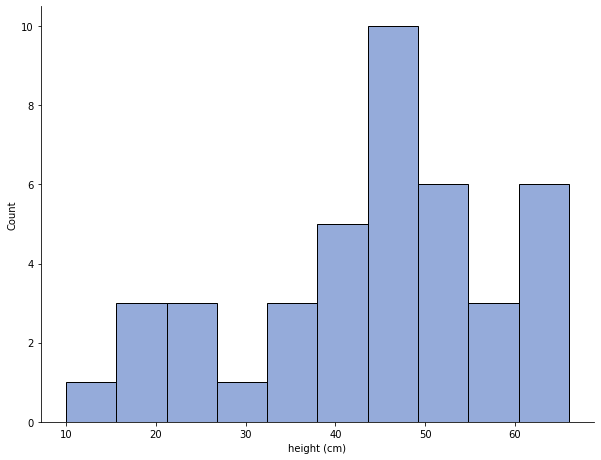

In [ ]:
# Creating a histogram for dog height
sns.displot(data = dataset, x = 'height (cm)', height = 6.5, aspect = 1.3, color = '#728FCE', bins = 10);

Now we will show the creation of two other types of graphs that show the distribution of data points differently.

**The boxplot** consists of three essential parts that show the number of values and can detect potential outliers (values that are significantly different from the majority of values): 

- **a box** that displays most of the data points
- **the vertical lines** on both ends of the box
- **whiskers** are short horizontal lines that are perpendicular to the vertical lines and show outliers

On the other hand, **the swarm plot** displays every data point, so we can better observe the distribution of values.

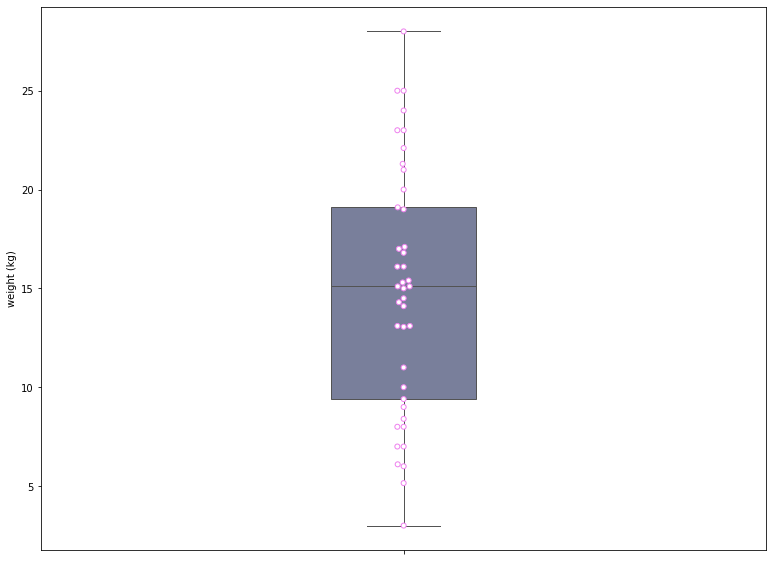

In [ ]:
# Creating a boxplot for dog weight
sns.boxplot(data = dataset, y = 'weight (kg)', color = '#737CA1', width = 0.2, linewidth = 1)

# Creating a swarmplot for dog weight
sns.swarmplot(data = dataset, y = 'weight (kg)',color = 'white', edgecolor = 'violet', linewidth = 1);

## 2.2 Bivariate visuals

Having explored the data using univariate visuals, we move on to create bivariate visuals where we observe how two columns are related to each other.

For example, we are interested in the age distribution by the dog breed. The graph shows how different the distribution is for each breed. The ages of the Border Collie and Dachshund breeds are quite similar except for one Border Collie dog whose age is shown as an outlier. The largest age range has the dogs of the Irish Setter.

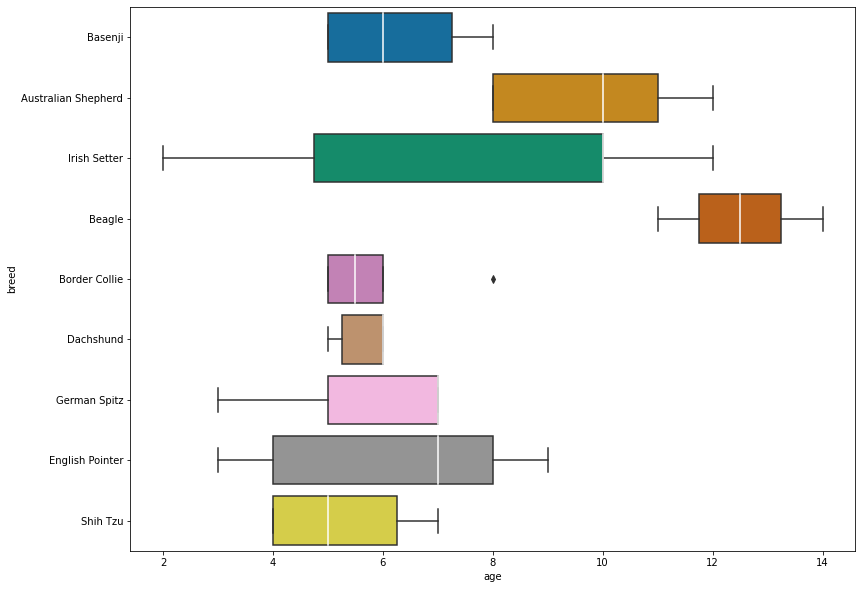

In [ ]:
# Creating a boxplot for the age based on the dog breeds
sns.boxplot(data = dataset, x = 'age', y = 'breed', palette = 'colorblind', width = .8, medianprops={'color':'white'});

# 3. scikit-learn library 📚

In this section, we will explain how we can create predictions using `scikit-learn` library. You can read more about this library in [the documentation](https://scikit-learn.org/stable/).

Let's say we want to have a model that will be able to predict gender based on the data we have available. It is a classification problem because our model can predict only two possible outcomes: 'female dog' or 'male dog'.


## 3.1 The journey to predictions 🔎

A machine learning model expects to receive the data in a specific format in order to be able to work with it. The data scientist's job is to make such transformations that transform the data into a suitable format that can eventually help the model make better predictions 👍 

This process is called **feature engineering** and includes various methods we use to transform numerical and categorical features. We will utilize a function from `compose` module to wrap all transformations and a predictive model into a single unit.


**1. step: Creating the training and holdout sets**

A machine-learning model must always learn **from the training data**. We should never let it learn on the holdout (or production) data and use this subset only for model evaluation. After we train a model, it will produce the predictions based on what it learned. 

- At first, we will separate our `independent features` (columns `breed`, `weight (kg)`, `height (cm)`, `age`, `ww_ratio`) from the `dependent feature` (also called a target feature, which we are predicting: `gender`). 
We store these columns in new variables called 'X' and 'y':



In [ ]:
# Creating new variables
dataset.gender = dataset.gender.apply(lambda x: 1 if x == 'female dog' else 0)
X = dataset.drop('gender', axis = 1)
y = dataset['gender']

- Then, we will create the training and holdout set using `train_test_split()` function. The holdout set will contain **20% of the data** that we use to measure model performance:

In [ ]:
# Importing
from sklearn.model_selection import train_test_split

# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

As you can see above, the data will be stored in new variables: 
- 'X_train' and 'y_train' contain the training data
- 'X_test' and 'y_test' contain the holdout (production) data

In [ ]:
# Training set - independent features
X_train.head()

,breed,weight (kg),height (cm),age,ww_ratio
6,Basenji,8.000,37,5,0.216216
26,Border Collie,16.100,52,5,0.309615
12,Basenji,13.055,45,8,0.290111
17,Dachshund,13.100,44,6,0.297727
9,Irish Setter,25.000,66,10,0.378788


In [ ]:
# Holdout set - dependent feature 
y_train[:5]

6     1
26    0
12    1
17    1
9     0
Name: gender, dtype: int64

**2. step: Creating a Pipeline** 

We will utilize a composite called a Pipeline. You can think of a Pipeline as a packet where you can put everything you need to prepare features and make predictions. It means that we can **wrap the whole feature engineering along with a predictive model inside this composite**. 

First, we will import the necessary methods:

In [ ]:
# Importing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

 
➡ Categorical features often contain individual categories stored as text (string data). However, predictive models can not handle text. Therefore, giving some numerical form to this string data is necessary. This transformation is called **encoding**.

- We will encode the values present in categorical column 'breed' into numbers using `OneHotEncoder()` transformer.
- ⬇ This transformation will create new binary columns where a transformer marks whether the category is present (takes the value 1) or not (takes the value 0). 



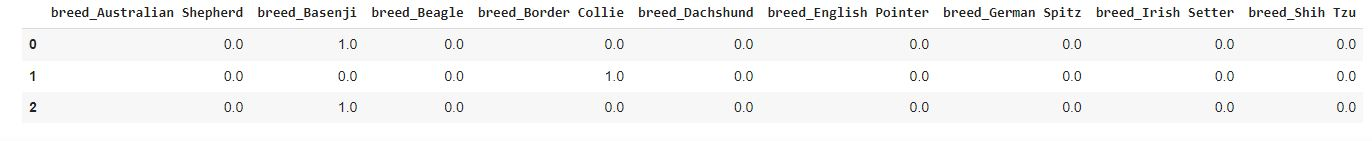

*Image source: Autors' creation*

➡ You may encounter numeric features whose values have significantly different scales. In that case, a model might perceive features where the values scale from 0 to 1000 differently than those from 0 to 5. Since we want a model to treat all features as "equal" 😏, we transform them into a unit scale.

- Values of the remaining numerical features will be scaled using  `MinMaxScaler()` method.
- ⬇ This transformer scales the data between 0 and 1. *Note: Specific visualization technique called Kernel density estimation is used. Hence direct readouts from the visualization can not be found exactly in the data.*


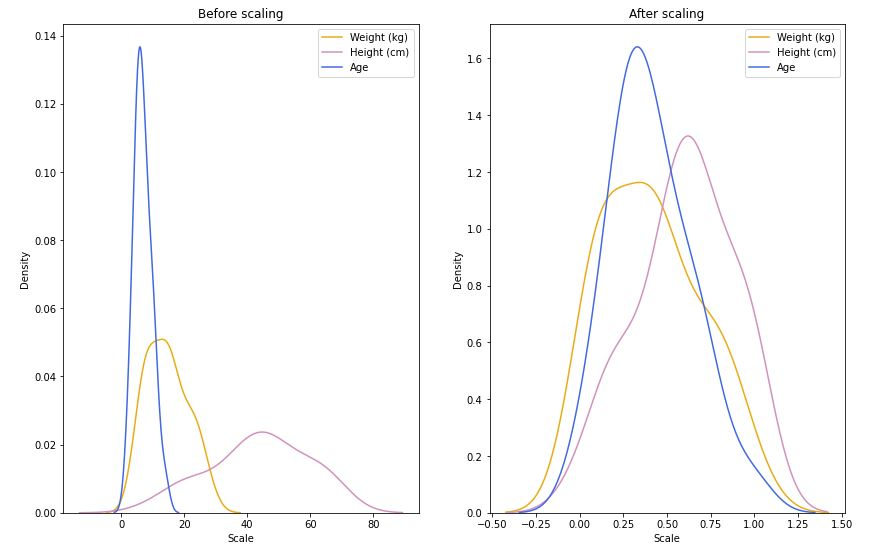

*Image source: Autors' creation*

We use a Decision tree as a predictive model and define `DecisionTreeClassifier()` method from `sklearn` library.

We define the feature engineering part and a predictive model in a Pipeline that have two steps where we define transformations and a predictive model:

- **Step 1:** encoding of a categorical feature, scaling of the numerical features

- **Step 2:** predictive model called a Decision tree

In [ ]:
# Creating a Pipeline

fe_model_pipeline = Pipeline(steps = [
    # The first tuple contains Feature engineering transformations
    ('features',
     ColumnTransformer([
         # One-hot encoding of categorical feature
         ('encoding', OneHotEncoder(categories = 'auto', drop = 'first', handle_unknown = 'error'), make_column_selector(dtype_include = object))
         ],
         # Scaling of numerical features
         remainder = MinMaxScaler()
         )
     ),
     # A predictive model
     ('model', DecisionTreeClassifier(max_depth = 3))
     ])

You can observe a structure of a Pipeline in the below diagram. Click on the cells with a small arrow ▶ to expand the content: 

In [ ]:
# Displaying a Pipeline as a diagram
set_config(display = 'diagram')
fe_model_pipeline

Pipeline(steps=[('features',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe800cc5310>)])),
                ('model', DecisionTreeClassifier(max_depth=3))])

Both transformers (`OneHotEncoder()`, `MinMaxScaler()`) and a predictive model (`DecisionTreeClassifier`) **need to learn from the training data**. Therefore we fit a Pipeline on the data stored in 'X_train' and 'y_train' variables.

The transformers will learn from the training data and transform the features during the fitting. Then a Decision tree model takes transformed features as input and learns patterns from them.

In [ ]:
# Displaying output as a text again
set_config(display = 'text')

# Fitting a Pipeline on the training data
fe_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('encoding',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe800cc5310>)])),
                ('model', DecisionTreeClassifier(max_depth=3))])

To make predictions for the training data, we use `predict()` method and store the result in 'y_train_predictions' variable. Observe the output and notice that there is a created prediction for each observation in the training set:


In [ ]:
# Creating predictions for the training data
y_train_predictions = fe_model_pipeline.predict(X_train)

# Printing the output
y_train_predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

Let´s create the predictions also for the production data:

In [ ]:
# Creating predictions for the production data
y_test_predictions = fe_model_pipeline.predict(X_test)

# Printing the output
y_test_predictions

array([0, 0, 0, 0, 0, 1, 0, 1, 0])

We can even visualize our predictive model! Ours is a bit of an ugly duckling 🦆 since we used a small toy dataset to create it. But we can see how the model separates (and therefore classifies) male dogs and female dogs:

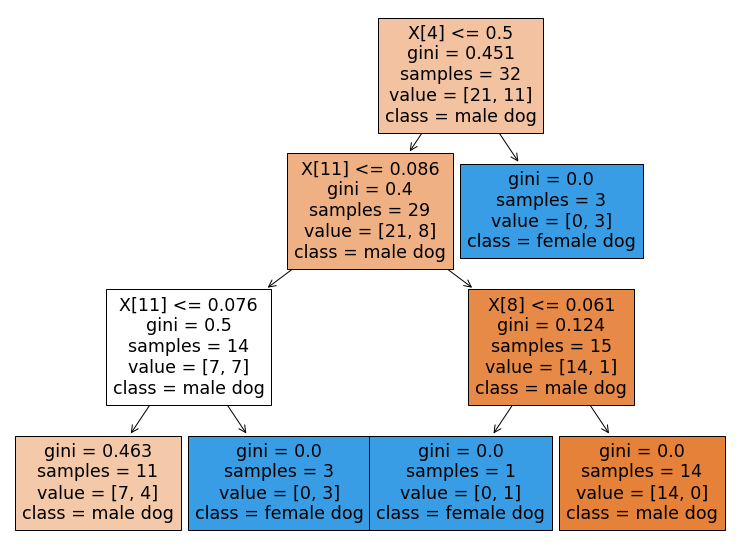

In [ ]:
# Visualizing a DecisionTree
from sklearn import tree
tree.plot_tree(fe_model_pipeline['model'], filled = True, class_names = ['male dog','female dog']);

## 3.2 Model evaluation 🏆

You may be asking yourself - *so how good should our model be?* It should achieve at least 90% accuracy, for example. There is no such universal rule. The performance of a model is always dependent on the data we use. The question of whether a given performance is sufficient is always answered by the problem to which the model is to be applied. 

➡ For example, we want to predict which customer will not be able to pay the mortgage. Our model has a recall score of 96%. The way we have been doing this estimation so far has a recall score of 92%. Is investing in a predictive model worth a 4% improvement? If so, the model is good enough. 

When we train a machine learning model, we want it to learn **generalizable patterns in the training data**. Thus, the training data is available to train on, while it only predicts on **holdout or production data**. The holdout and production data are always at least a little different from the training data. Our model must be **generalizable**, even when faced with "slightly" different data than the training data, and **must be able to predict well enough on that data as well**.





### 3.2.1 Confusion matrix

Since we are solving a classification problem, let's look at the confusion matrix and three metrics that can be computed on top of it.

Based on the data for which we are making predictions, the outcomes of the confusion matrix can be as follows:

| Outcome | Predicted value | Actual value         
| --- |--- | --- |
|True Positive:|a dog is predicted to be 'female dog'| actual value is 'female dog'
|True Negative:|a dog is predicted to be 'male dog'| actual value is 'male dog'
|False Positive:|a dog is predicted to be 'female dog'| actual value is 'male dog'
|False Negative:|a dog is predicted to be 'male dog'| actual value is 'female dog'

Please, take a look at the values we computed below. The correct predictions (True positive and True negative) are placed on the diagonal. We can interpret the values as follows: 

- 21 dogs: were correctly predicted as 'female dog'
- 7 dogs: were correctly predicted as 'male dog'
- 4 dogs: were incorrectly predicted as 'male dog' while in the reality these are 'female dogs'
- 0 dogs: - a model did not predict any dog to be 'male dog' while in reality is 'female dog'

In [ ]:
# Importing
from sklearn.metrics import confusion_matrix

# Computing a confusion matrix
confusion_matrix(y_train, y_train_predictions)

array([[21,  0],
       [ 4,  7]])

### 3.2.2 Accuracy score

Next, we will find out how accurate our model is. The `accuracy score` tells us about the fraction of correct predictions that a model produced:

```
accuracy_score = (TP + TN) / (TP + FP + TN + FN)

```

In our case, it´s a fraction of individuals who were correctly predicted to **be 'female dogs' and 'male dogs'**. 



In [ ]:
# Importing
from sklearn.metrics import accuracy_score

# The training data
print(f'Accuracy score for training data is: {accuracy_score(y_train, y_train_predictions)*100}%')

# The holdout data
print(f'Accuracy score for holdout data is: {round(accuracy_score(y_test, y_test_predictions),2)*100}%')

Accuracy score for training data is: 87.5%
Accuracy score for holdout data is: 44.0%


### 3.2.3 Precision score

The precision score is a ratio of True positive predictions out of all positive predictions that a model has made:

```
precision_score = TP / (TP + FP)
```

The result of the precision score will tell us **how precise our model is to correctly predict dogs to be 'female dogs' out of all positive predictions** that it produced.

In [ ]:
# Importing
from sklearn.metrics import precision_score

# The training data
print(f'Precision score for training data is: {precision_score(y_train, y_train_predictions)*100}%')

# The holdout data
print(f'Precision score for holdout data is: {precision_score(y_test, y_test_predictions)*100}%')

Precision score for training data is: 100.0%
Precision score for holdout data is: 50.0%


### 3.2.4 Recall score 

Recall can tell us how good a model is in predicting True labels correctly:

```
recall_score = TP / (TP + FN)  
```

Let´s compute the recall score for our model and find out **how good the model is at predicting dogs to be 'female dogs' correctly**.





In [ ]:
# Importing
from sklearn.metrics import recall_score

# The training data
print(f'Recall score for training data is: {round(recall_score(y_train, y_train_predictions),3)*100}%')

# The holdout data
print(f'Recall score for holdout data is: {round(recall_score(y_test, y_test_predictions),3)*100}%')

Recall score for training data is: 63.6%
Recall score for holdout data is: 20.0%


# 4. Natural Language Processing 📑

Machine learning models need numbers to work with. What can we do when the input is text? In this section, you will learn how to convert text to numbers with a method called *bag of words*. 

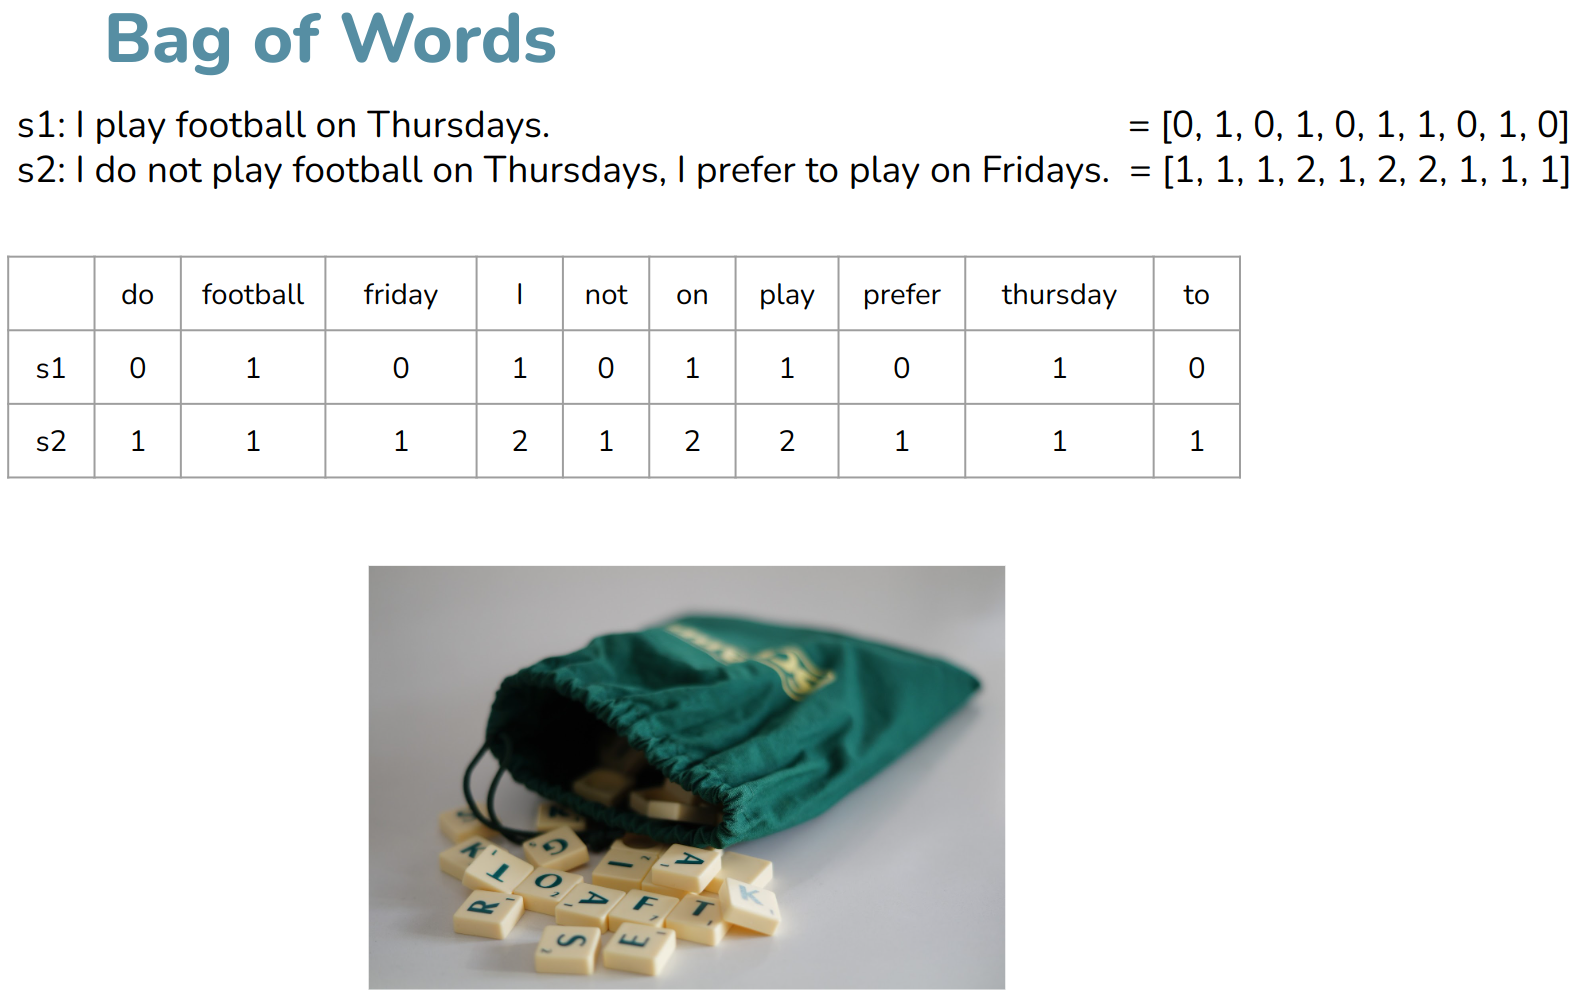

- *Example source: Autors' creation*
- *Image source: https://pixabay.com/photos/scrabble-tiles-letters-pouch-5981980/*

## 4.1 Bag of Words CountVectorizer

One unit of text in the NLP lingo is called a document. In our case, 1 document is 1 sentence. A collection of documents is called a corpus. We define a corpus of two documents.

In [ ]:
# Define a corpus
corpus = ['I play football on Thursdays.', 
          'I do not play football on Thursdays, I prefer to play on Fridays.']

Bag of Words is implemented in sklearn in the module CountVectorizer. You can read the documentation for a description of the class and its parameters [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer
).


In [ ]:
# Instantiate CountVectorizer
bof_vectorizer = CountVectorizer()

# Fit and transform the bag of words vectorizer on our corpus
bof_vectorizer.fit(corpus)
bof_vectors = bof_vectorizer.transform(corpus)

The bag of words representation has tens or hundreds of thousands of columns 
for normal texts, which results in a high RAM memory requirement. Therefore, the matrix is rather stored as a sparse matrix as there are anyway a lot of zeros.

In [ ]:
# Show the sparse matrix object
bof_vectors

<2x9 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in Compressed Sparse Row format>

Example of the sparse representation of the first sentence:

In [ ]:
# Print the output
print(bof_vectors[0,:])

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1


We can convert the sparse matrix to the usual dense matrix, but in the real-life example, there would be a lot of zeros, so saving it in this format is inefficient.

In [ ]:
# Convert the spares matrix to the dense matrix
bof_vectors_dense = bof_vectors.todense()

# Print the output
bof_vectors_dense

matrix([[0, 1, 0, 0, 1, 1, 0, 1, 0],
        [1, 1, 1, 1, 2, 2, 1, 1, 1]])

The ordered names of the features can be accessed with *get_feature_names_out()* method:

In [ ]:
# Return feature names
feature_names = bof_vectorizer.get_feature_names_out()

# Print the output
feature_names

array(['do', 'football', 'fridays', 'not', 'on', 'play', 'prefer',
       'thursdays', 'to'], dtype=object)

We can join the above 2 into the dataframe:

In [ ]:
# Print dataframe
pd.DataFrame(bof_vectors_dense, columns=feature_names)

,do,football,fridays,not,on,play,prefer,thursdays,to
0,0,1,0,0,1,1,0,1,0
1,1,1,1,1,2,2,1,1,1


The vocabulary can be accessed with the *vocabulary_* attribute. It is a dictionary with keywords and positions of the keywords in the vocabulary.

In [ ]:
# Vocabulary
bof_vectorizer.vocabulary_

{'play': 5,
 'football': 1,
 'on': 4,
 'thursdays': 7,
 'do': 0,
 'not': 3,
 'prefer': 6,
 'to': 8,
 'fridays': 2}

Notice the following from the vocabulary:
- all the words are in lowercase, e.g. fridays. This is because of the following parameter, which default behaviour is **lowercase = True**
- We see that the word _I_ and punctuation are not included in the vocabulary. This is because the CountVectorizer() first tokenizes the corpus and includes, by default, only tokens equal to or longer than 2 characters. We can change this behaviour by using a different tokenizer, by default **tokenizer = None**

What if we wanted to encode a new document?

In [ ]:
# Define a new document
new_document = ['I join the soccer game on day before Fridays.']

Transform *new_document* with already trained vectorizer:

In [ ]:
# Transform
bof_vectors_new = bof_vectorizer.transform(new_document)

# Print DataFrame
pd.DataFrame(bof_vectors_new.todense(), columns=feature_names)

,do,football,fridays,not,on,play,prefer,thursdays,to
0,0,0,1,0,1,0,0,0,0


We can see that the *new_document* is represented only by 2 tokens that are in the trained vocabulary. Out of vocabulary words like *before* or *soccer* cannot be represented.

### 4.1.1 stop_words

- **stop_words = None**: Stopwords are not removed by default, but you can either remove some predefined stopwords, e.g. 'english' or define your own list of stopwords.

Below we will exclude English stopwords. You can see in the output that the words *do, not, on, to* are excluded from the vocabulary.

In [ ]:
# Instantiate and fit CountVectorizer with the option to exclude english stopwords
bof_vectorizer_sw_english = CountVectorizer(stop_words='english').fit(corpus)

# Vocabulary
bof_vectorizer_sw_english.vocabulary_

{'play': 2, 'football': 0, 'thursdays': 4, 'prefer': 3, 'fridays': 1}

Below, we define our own list of stopwords that includes words *thursdays, fridays*. You can see in the output that these words are removed from the vocabulary.

In [ ]:
# Instantiate and fit CountVectorizer with the option to exclude own defined stopwords
bof_vectorizer_sw_own = CountVectorizer(stop_words=['thursdays', 'fridays']).fit(corpus)

# Vocabulary
bof_vectorizer_sw_own.vocabulary_

{'play': 4, 'football': 1, 'on': 3, 'do': 0, 'not': 2, 'prefer': 5, 'to': 6}

### 4.1.2 binary

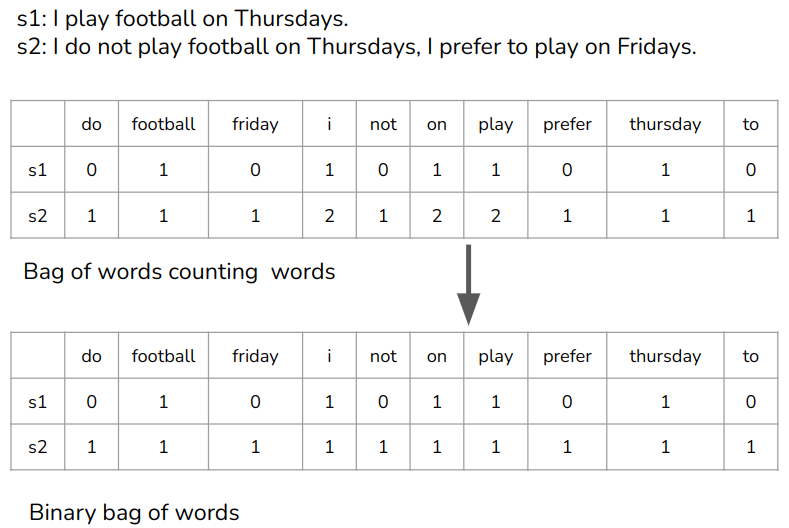

*Image source: Autors' creation*

by default **binary=False**. If False ==> count frequencies of the tokens are used, otherwise just use a binary flag stating if the token occurs in the vocabulary. Only zeros and ones will be used in the output.

Below, we fit the binary version of the Bag of Words. You can see in the output, that for words *on* and *play* the flag 1 was used instead of the count 2.

In [ ]:
# Instantiate CountVectorizer with the option to 
# Use binary term frequencies
bof_vectorizer_binary = CountVectorizer(binary=True)

# Fit and transform
bof_vectorizer_binary.fit(corpus)
bof_vectors_binary = bof_vectorizer_binary.transform(corpus)

# Print DataFrame
pd.DataFrame(bof_vectors_binary.todense(), columns=feature_names)

,do,football,fridays,not,on,play,prefer,thursdays,to
0,0,1,0,0,1,1,0,1,0
1,1,1,1,1,1,1,1,1,1


### 4.1.3 ngram_range

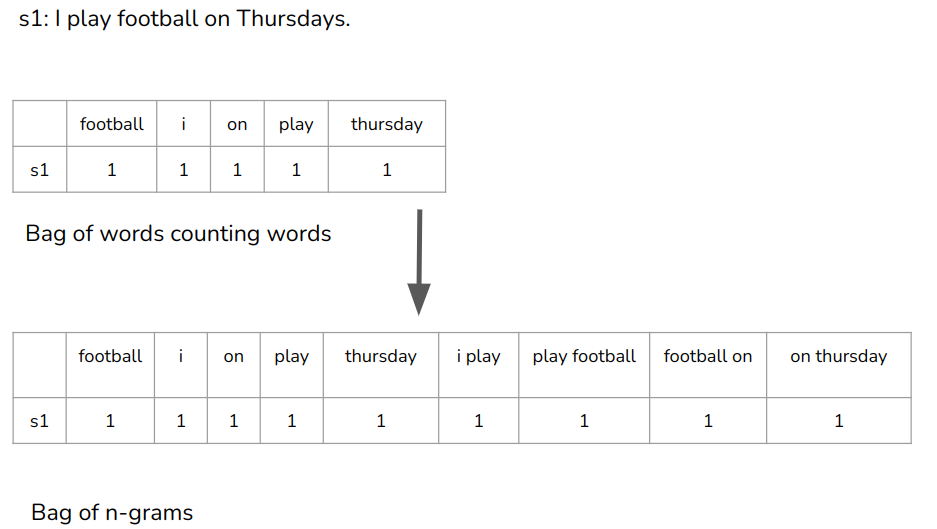

*Image source: Autors' creation*

**ngram_range=(min_n=1, max_n=1)**: By default only unigrams are used for building a vocabulary. If we wanted to build a vocab out of bigrams and unigrams, we could set ngram_range=(1, 2)

Below, we fit Bag of Words with unigrams and bigrams in the vocabulary. You can see that the vocabulary is now much larger, but we at least, to a certain extent, capture the order of the words.

In [ ]:
# Instantiate CountVectorizer with the option to 
# Use ngrams from the length of 1 to the length of 2
bof_vectorizer_ngram = CountVectorizer(ngram_range=(1,2))

# Fit and transform
bof_vectorizer_ngram.fit(corpus)
bof_vectors_ngram = bof_vectorizer_ngram.transform(corpus)

# Print DataFrame
pd.DataFrame(bof_vectors_ngram.todense(), 
             columns=bof_vectorizer_ngram.get_feature_names_out())

,do,do not,football,football on,fridays,not,not play,on,on fridays,on thursdays,play,play football,play on,prefer,prefer to,thursdays,thursdays prefer,to,to play
0,0,0,1,1,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1


We have learned how to convert text into numbers with an effective algorithm called Bag of Words. Now, we are able to use the created features as an input to the model that we need. For example, we could classify text with a random forest model.

# 5. Image Classification ✈

We will learn how to perform an image classification with a classical method from machine learning called Random Forest. As the input features, we will first use pixel values and then extract the objects' edges, which will serve as input features.

## 5.1 Import libraries and Load Data

In [ ]:
# For image classification
import sys
import cv2 

If there is a problem with an import of the cv2 (open-cv for python) in the above code and you are a windows user then follow these instructions: https://docs.opencv.org/4.x/d5/de5/tutorial_py_setup_in_windows.html

For Linux users run the following code in terminal: 

```
apt-get update
apt-get install ffmpeg libsm6 libxext6  -y
apt-get install -y python3-opencv
```

If the problems still occur then uninstall opencv by copying the below line in the separate cell and run it 
```
! pip uninstall opencv-python
```
and install for google colab again by copying the below line in the separate cell and running it: 
```
! {sys.executable} -m pip install opencv-python-headless==4.6.0.66
```
or for local python
```
! {sys.executable} -m install opencv-contrib-python==4.6.0.66
```

In [ ]:
# You can check a library version installed in your environment by uncommenting and executing the following print statement:
#print('openCV version:',cv2.__version__)

# For missing cv2 run the one below line
#!{sys.executable} -m pip install opencv-python==4.6.0.66 
#!{sys.executable} -m pip install tensorflow==2.10.0

Let's load the well-known dataset for image classification from this [website](https://www.cs.toronto.edu/~kriz/cifar.html). 

Citation: Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009. 

Choose a data loading option that is suitable for your working environment. After choosing your option uncomment the respective cell below this cell:
1. GOOGLE COLAB or LOCAL JUPYTER **Load the data with Tensorflow**
   - Run the code cell containing the commands to install and load the needed library and loading the data.
   - Tensorflow might conflict with other libraries or might need a different installation depending on the operating system. Either, you can try to figure out how to install Tensorflow with your setup or try a different option.

2. GOOGLE COLAB: **Uploading file from your local machine into Colab session**
   - On the left pane click the "Files" icon that will open "Files explorer". Right click with your mouse and create a folder named 'data'. Enter the created folder and then click on "Upload to session storage" icon and navigate to the folder where you stored the data. If your uploaded files do not appear immediately, click the "Refresh" button. This might take few minutes depending on your internet speed as the files have ca 190 MB in total.
   - Be mindful that you might have to reload the data whenever you restart your session, so this option is the least practical.

3. LOCAL JUPYTER **Loading the data via relative path into Jupyter notebook**
   - Run the cell code containing the path to a data folder with the files stored on your computer next to this notebook.
   - Be mindful that if you move your notebook away from the "data" folder stored next to it, you might have to adjust the path.

If you work on your company machine, your company's firewall might be blocking e.g. Google Colab, uploading file to the Google Colab or installation of some packages.


In [ ]:
# OPTION 1
# load the data with tensorflow

# install and load tensorflow
!{sys.executable} -m pip install tensorflow==2.10.0
import tensorflow as tf

# read data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# # OPTION 2
# # load the data from the working directory

# # Remember to first upload the data to the working directory in Google Colab
# x_train = np.load('data/x_train.npy')
# x_test = np.load('data/x_test.npy')
# y_train = np.load('data/y_train.npy')
# y_test = np.load('data/y_test.npy')

In [ ]:
# # OPTION 3
# # load the data from the local folder

# # Remember to keep the data folder next to the jupyter notebook file
# x_train = np.load('data/x_train.npy')
# x_test = np.load('data/x_test.npy')
# y_train = np.load('data/y_train.npy')
# y_test = np.load('data/y_test.npy')

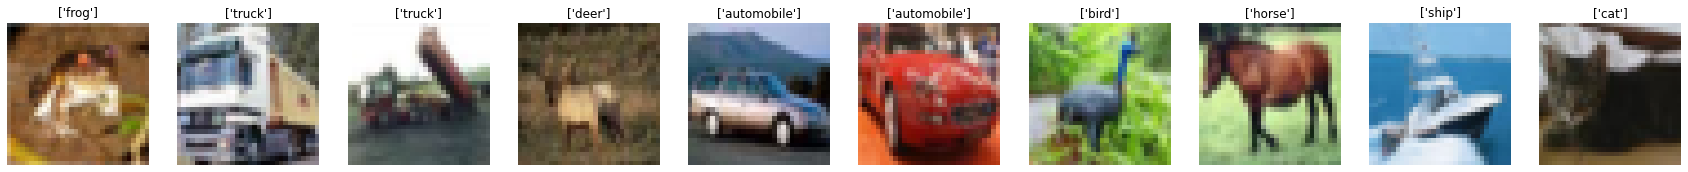

In [ ]:
# define mapping for labels
label_mapping_cifar10 = {0: 'airplane',
1: 'automobile',
2: 'bird',
3: 'cat',
4: 'deer',
5: 'dog',
6: 'frog',
7: 'horse',
8: 'ship',
9: 'truck'}

# show examples of the images
y_train_names = np.vectorize(label_mapping_cifar10.get)(y_train)
fig, ax = plt.subplots(1, 10, figsize=(30, 10))

for i in range(10):
    ax[i].imshow(x_train[i])
    ax[i].set_axis_off()
    ax[i].set_title(y_train_names[i]);

There are 50000 images in the training set and 10000 images in the test set. In total, there are 10 classes. Above, we randomly plotted some of the images.

The dataset has a shape of (# images, height, width, # channels). For the classical model, we need to convert this shape to the shape (# images, attributes). We will use a function .reshape() where we specify the shape of the dataset we would like to get. The first element of the new shape will be the number of images, and the second one will be height x width x channels. Instead of writing the multiplication with the 3 values, we can just write -1, which means that it will flatten all the remaining elements. 

We will also reshape the y_train and y_test as the random forest in sklearn expects the labels to be a 1D array.



In [ ]:
# reshape the images
x_train_new = x_train.reshape(x_train.shape[0], -1)
x_test_new = x_test.reshape(x_test.shape[0], -1)

y_train_new = y_train.reshape(-1, )
y_test_new = y_test.reshape(-1, )

print(f'x_train shape: {x_train_new.shape}')
print(f'x_test shape: {x_test_new.shape}')
print(f'y_train shape: {y_train_new.shape}')
print(f'y_test shape: {y_test_new.shape}')

x_train shape: (50000, 3072)
x_test shape: (10000, 3072)
y_train shape: (50000,)
y_test shape: (10000,)


In [ ]:
# return the unique values and counts of the classes
unique_values, counts = np.unique(y_train_new, return_counts=True)
list(zip(unique_values, counts))

[(0, 5000),
 (1, 5000),
 (2, 5000),
 (3, 5000),
 (4, 5000),
 (5, 5000),
 (6, 5000),
 (7, 5000),
 (8, 5000),
 (9, 5000)]

## 5.2 Classic Model

In this section, we will perform an image classification with the classical machine learning method called Random Forest. 

The classes are perfectly balanced so that we can look at the accuracy. We will train the random forest classifier and limit the depth of the trees to avoid overfitting.

In [ ]:
%%time
# fit the random forest model
model = RandomForestClassifier(max_depth=3, random_state=42)
model.fit(x_train_new, y_train_new)

CPU times: user 47.8 s, sys: 265 ms, total: 48.1 s
Wall time: 1min 1s


RandomForestClassifier(max_depth=3, random_state=42)

In [ ]:
# print the accuracy on a train set
print(f'Accuracy score for training data is: {model.score(x_train_new, y_train_new)*100}%')

# print the accuracy on a test set
print(f'Accuracy score for test data is: {model.score(x_test_new, y_test_new)*100}%')

Accuracy score for training data is: 28.888%
Accuracy score for test data is: 29.18%


## 5.3 Apply the Model on Edges

Below, we will extract edges in the image with an open-CV library. The code works well in Google Colab. If you are running the code locally, you might have to install the opencv-python library first. If this is the case, install the libraries as written at the beginning of the notebook.

In [ ]:
# define vertical edge detector filter
filter_vertical = np.array([[1, 0, -1],
                            [2, 0, -2],
                            [1, 0, -1]])

# define horizontal edge detector filter
filter_horizontal = np.array([[-1, -2, -1],
                              [0, 0, 0],
                              [1, 2, 1]])

# create array of zeros with the shape of number of pictures and 2 times
# the shape of the width * height as we will extract both horizontal and 
# vertical edges
x_train_edges = np.zeros(shape=(x_train.shape[0], 
                                x_train.shape[1]*x_train.shape[2]*2))

# loop through all images in train set
for i in range(x_train.shape[0]): 
  # grayscale the image
  img_gray = cv2.cvtColor(x_train[i], cv2.COLOR_BGR2GRAY)
  # extract vertical edges
  img_edges_vertical = cv2.filter2D(img_gray, -1, filter_vertical)
  # extract horizontal edges
  img_edges_horizontal = cv2.filter2D(img_gray, -1, filter_horizontal)
  # concatenate the two sets of features for every image
  x_train_edges[i, :] = np.concatenate(
    (img_edges_vertical.reshape(x_train.shape[1]*x_train.shape[2]), 
     img_edges_horizontal.reshape(x_train.shape[1]*x_train.shape[2])),
     axis=0)

# repeat the same for the test set
x_test_edges = np.zeros(shape=(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*2))

for i in range(x_test.shape[0]): 
  # grayscale the image
  img_gray = cv2.cvtColor(x_test[i], cv2.COLOR_BGR2GRAY)
  # img_gray=x_test[i]
  img_edges_vertical = cv2.filter2D(img_gray, -1, filter_vertical)
  img_edges_horizontal = cv2.filter2D(img_gray, -1, filter_horizontal)
  x_test_edges[i, :] = np.concatenate(
    (img_edges_vertical.reshape(x_test.shape[1]*x_test.shape[2]), 
     img_edges_horizontal.reshape(x_test.shape[1]*x_test.shape[2])),
     axis=0)

In [ ]:
%%time
# fit the random forest model
model2 = RandomForestClassifier(max_depth=3, random_state=42)
model2.fit(x_train_edges, y_train_new)

CPU times: user 21.9 s, sys: 45.3 ms, total: 22 s
Wall time: 23 s


RandomForestClassifier(max_depth=3, random_state=42)

In [ ]:
# print the accuracy on a train set
print(f'Accuracy score for training data is: {model2.score(x_train_edges, y_train_new)*100}%')

# print the accuracy on a test set
print(f'Accuracy score for test data is: {model2.score(x_test_edges, y_test_new)*100}%')

Accuracy score for training data is: 22.814%
Accuracy score for test data is: 21.01%


We limited the depth of the trees in the random forest to decrease overfitting and to save time of training. The performance is pretty bad. We would have to train longer and tune the hyperparameters. The two models, with original pixel values and with edge detected features perform quite similarly. These are the low resolution pictures, and detecting edges does not bring any benefit, but for higher resolution pictures, it could help. 

# 6. Licenses

Terms and conditions for using this educational material: (1) The participant who is provided with educational materials by the lecturers (authors of this material) is entitled to use these materials only and exclusively for personal and non-commercial purposes, to the extent necessary for the successful completion of the educational event. A participant shall comply with all intellectual property rights statements and restrictions contained in the materials or otherwise presented in connection with the materials. The participant is not entitled to grant the right to use the materials to third parties or transfer the right. The unauthorized use of the materials constitutes an infringement of intellectual property rights, which has both civil and criminal consequences. The participant is not entitled to copy or distribute any materials provided by the lecturers unless otherwise expressly stated by the lecturer. (2) This material is provided by the lecturers “as is” and any express or implied warranties, including, but not limited to, the implied warranties of merchantability and fitness for a particular purpose are disclaimed. In no event shall the lecturers be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) however caused and on any theory of liability, whether in contract, strict liability, or tort (including negligence or otherwise) arising in any way out of the use of this material, even if advised of the possibility of such damage.

Licenses of used libraries can be found in 'licenses.txt' file.

CIFAR10 dataset:  Citation: Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009. https://www.cs.toronto.edu/~kriz/cifar.html
